In [1]:
import numpy as np
from Utils.DTMC_Utils import DTMC_Utils
from Utils.GridGraph import GridGraph
from MultiRobotTargetSearch import MultiRobotTargetSearch
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
from tqdm import tqdm

In [2]:
np.random.seed(12345)

In [4]:
# Parametri
num_of_experiments = 1000
grid_dimension = 5
nodesNumber = grid_dimension * grid_dimension
grid_graph = GridGraph(grid_dimension, grid_dimension)

alpha = 1
Z_r = [4, 5, 6]
reference_information_state = 1
agents_list = [3, 4, 5, 6, 7, 8, 9, 10]  # Numero di agenti da testare

# Array per memorizzare i risultati
average_execution_times_all = []
std_execution_times_all = []
average_execution_times_noisy_all = []
std_execution_times_noisy_all = []

# Loop per ciascun valore di agent_number
for agent_number in tqdm(agents_list, desc="Processing agent counts"):
    average_execution_times = np.zeros(num_of_experiments, dtype=float)
    average_execution_times_noisy = np.zeros(num_of_experiments, dtype=float)

    for i in range(num_of_experiments):
        agents = DTMC_Utils.initAgents(agent_number, nodesNumber)
        initial_positions = [a.getPosition() for a in agents]

        # Esperimento senza rumore
        experiment = MultiRobotTargetSearch(agents, grid_graph, reference_information_state, Z_r, alpha)
        initial_state = experiment.getInformationStateVector()
        experiment.run()
        average_execution_times[i] = experiment.getMeanConsensusTime()

        # Ripristina le posizioni degli agenti
        for (j, a) in enumerate(agents):
            a.updatePosition(initial_positions[j])

        # Esperimento con rumore
        noisy_experiment = MultiRobotTargetSearch(agents, grid_graph, reference_information_state, Z_r, alpha, _noisy_measure=True)
        noisy_experiment.update_agents_information_state(initial_state[:-1])
        noisy_experiment.run()
        average_execution_times_noisy[i] = noisy_experiment.getMeanConsensusTime()

    # Calcola media e deviazione standard
    average_execution_times_all.append(np.mean(average_execution_times))
    std_execution_times_all.append(np.std(average_execution_times))
    average_execution_times_noisy_all.append(np.mean(average_execution_times_noisy))
    std_execution_times_noisy_all.append(np.std(average_execution_times_noisy))

Processing agent counts: 100%|██████████| 8/8 [02:51<00:00, 21.45s/it]


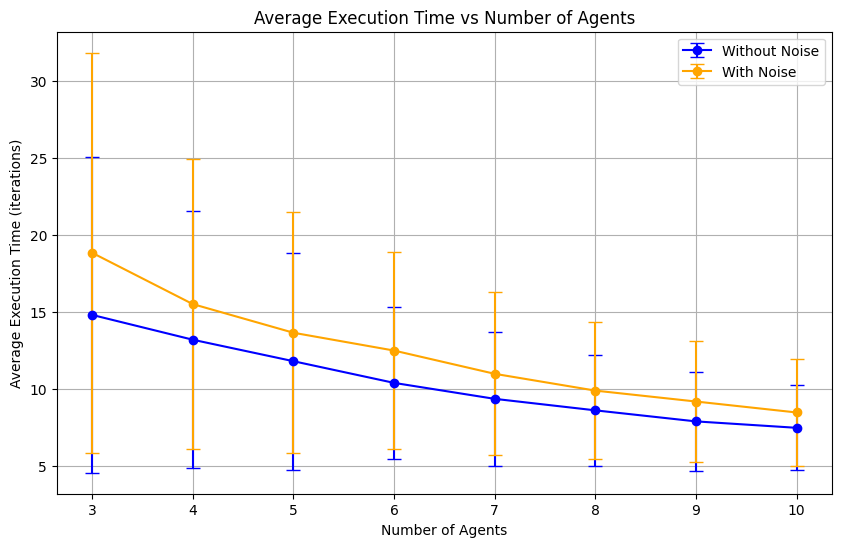

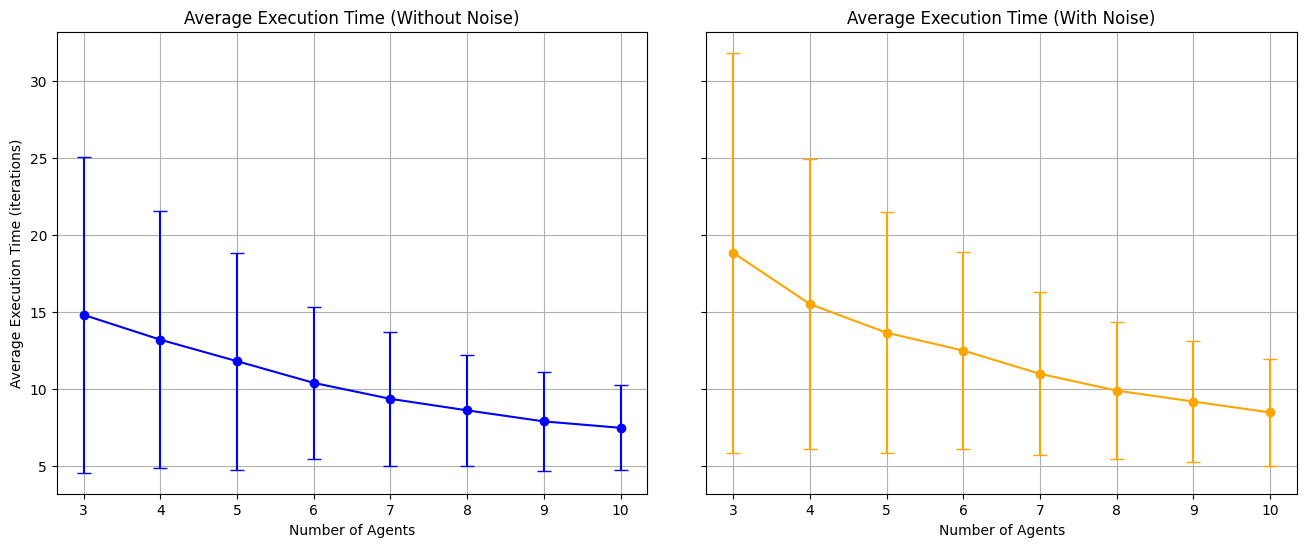

In [5]:
plt.figure(figsize=(10, 6))
plt.errorbar(
    agents_list,
    average_execution_times_all,
    yerr=std_execution_times_all,
    fmt='-o',
    label="Without Noise",
    capsize=5,
    color='blue'
)
plt.errorbar(
    agents_list,
    average_execution_times_noisy_all,
    yerr=std_execution_times_noisy_all,
    fmt='-o',
    label="With Noise",
    capsize=5,
    color='orange'
)
plt.title("Average Execution Time vs Number of Agents")
plt.xlabel("Number of Agents")
plt.ylabel("Average Execution Time (iterations)")
plt.legend()
plt.grid(True)
plt.show()

# Creazione dei subplot orizzontali
fig, axs = plt.subplots(1, 2, figsize=(16, 6), sharey=True)
fig.subplots_adjust(wspace=0.1)  # Spazio tra i subplot

# Grafico senza rumore
axs[0].errorbar(
    agents_list,
    average_execution_times_all,
    yerr=std_execution_times_all,
    fmt='-o',
    capsize=5,
    color='blue'
)
axs[0].set_title("Average Execution Time (Without Noise)")
axs[0].set_xlabel("Number of Agents")
axs[0].set_ylabel("Average Execution Time (iterations)")
axs[0].grid(True)

# Grafico con rumore
axs[1].errorbar(
    agents_list,
    average_execution_times_noisy_all,
    yerr=std_execution_times_noisy_all,
    fmt='-o',
    capsize=5,
    color='orange'
)
axs[1].set_title("Average Execution Time (With Noise)")
axs[1].set_xlabel("Number of Agents")
axs[1].grid(True)

# Mostra i grafici
plt.show()

In [6]:
print("No noise average: ", average_execution_times_all)
print("No noise sd: ", std_execution_times_all)
print("Noisy: ", average_execution_times_noisy_all)
print("Noisy sd: ", std_execution_times_noisy_all)

No noise average:  [np.float64(14.818666666666665), np.float64(13.21025), np.float64(11.817800000000002), np.float64(10.412166666666668), np.float64(9.377285714285714), np.float64(8.632), np.float64(7.9158888888888885), np.float64(7.499899999999999)]
No noise sd:  [np.float64(10.229630513583784), np.float64(8.341072019680682), np.float64(7.034466799978517), np.float64(4.923264699927839), np.float64(4.349792673923948), np.float64(3.5843733413248127), np.float64(3.193620088802821), np.float64(2.7511324922656852)]
Noisy:  [np.float64(18.845333333333336), np.float64(15.5195), np.float64(13.662400000000002), np.float64(12.507), np.float64(10.999714285714287), np.float64(9.91125), np.float64(9.204), np.float64(8.494)]
Noisy sd:  [np.float64(12.968743209904515), np.float64(9.387438135615064), np.float64(7.819536190849173), np.float64(6.389127561725466), np.float64(5.290800633830268), np.float64(4.435580394660883), np.float64(3.9509947239450947), np.float64(3.4445034475233145)]


In [8]:
# Array per memorizzare le variazioni percentuali
percentage_variation_average_time = []
percentage_variation_std_time = []

# Loop per calcolare la variazione percentuale per ciascun numero di agenti
for idx in range(len(agents_list)):
    avg_no_noise = average_execution_times_all[idx]
    avg_with_noise = average_execution_times_noisy_all[idx]
    std_no_noise = std_execution_times_all[idx]
    std_with_noise = std_execution_times_noisy_all[idx]

    # Calcolo della variazione percentuale
    avg_time_variation = ((avg_with_noise - avg_no_noise) / avg_no_noise) * 100
    std_time_variation = ((std_with_noise - std_no_noise) / std_no_noise) * 100

    # Aggiunta ai rispettivi array
    percentage_variation_average_time.append(avg_time_variation)
    percentage_variation_std_time.append(std_time_variation)

# Stampa i risultati
print("Variazione percentuale del tempo medio di esecuzione:", percentage_variation_average_time)
print("Variazione percentuale della deviazione standard:", percentage_variation_std_time)


Variazione percentuale del tempo medio di esecuzione: [np.float64(27.17293503689044), np.float64(17.480744119149904), np.float64(15.60865812587791), np.float64(20.11909144750531), np.float64(17.30168644597129), np.float64(14.81985634847082), np.float64(16.272475892368384), np.float64(13.254843397911978)]
Variazione percentuale della deviazione standard: [np.float64(26.77626227734718), np.float64(12.544743810693518), np.float64(11.16032548299259), np.float64(29.774203727439495), np.float64(21.6333979673895), np.float64(23.747723026571162), np.float64(23.715238947729294), np.float64(25.203110253937865)]
